In [2]:
!pip install python-dotenv

import os
from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Load environment variables
load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")
DB_NAME = os.getenv("DB_NAME")
DB_HOST = os.getenv("DB_HOST", "localhost")
DB_PORT = os.getenv("DB_PORT", "3306")

In [3]:

# connect to MySQL
engine = create_engine(
    f"mysql+mysqlconnector://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)
df = pd.read_sql("SELECT * FROM real_train_delays", engine)

print("Rows, Columns:", df.shape)
print(df.head())

Rows, Columns: (1664, 12)
   id train_number      train_name station_code     station_name  \
0   1        12673  Cheran Express          MAS  CHENNAI CENTRAL   
1   2        12673  Cheran Express          AVD            AVADI   
2   3        12673  Cheran Express          AJJ        ARAKKONAM   
3   4        12673  Cheran Express          KPD       KATPADI JN   
4   5        12673  Cheran Express           SA         SALEM JN   

   average_delay_minutes  pct_right_time  pct_slight_delay  \
0                    2.0           98.90              0.27   
1                    0.0            0.27              0.00   
2                   16.0           55.34             44.38   
3                   17.0           48.49             49.86   
4                   25.0           23.01             74.79   

   pct_significant_delay  pct_cancelled_unknown          scraped_at  \
0                   0.00                   0.83 2025-09-27 17:55:38   
1                   0.00                  99.73 20

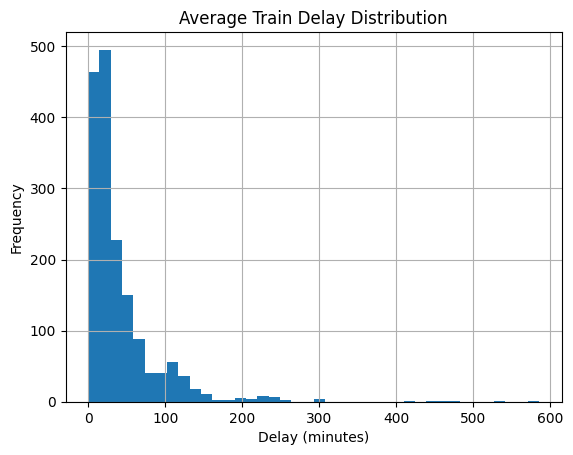

In [4]:

# Plot 1: Delay distribution

plt.figure()
df["average_delay_minutes"].dropna().hist(bins=40)
plt.title("Average Train Delay Distribution")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

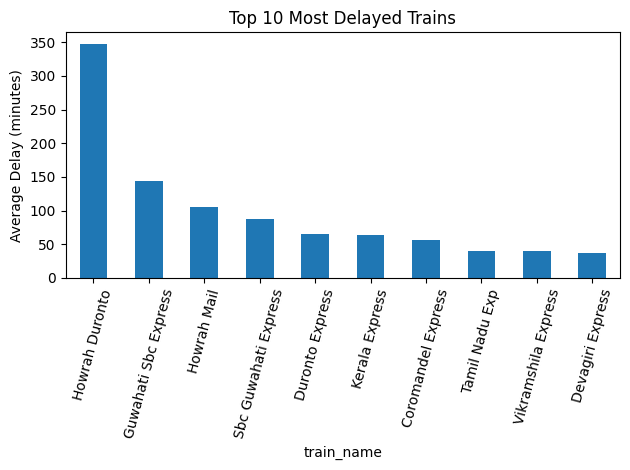

In [5]:

# Plot 2: Top 10 delayed trains

top_trains = (
    df.groupby("train_name")["average_delay_minutes"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_trains.plot(kind="bar")
plt.title("Top 10 Most Delayed Trains")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

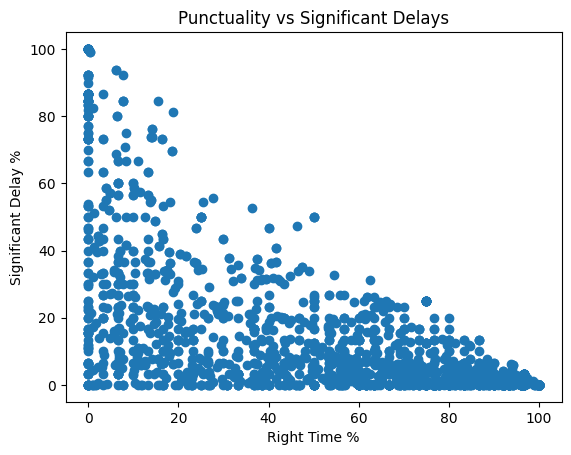

In [ ]:

# Plot 3: On-time vs significant delay

plt.figure()
plt.scatter(df["pct_right_time"], df["pct_significant_delay"])
plt.xlabel("Right Time %")
plt.ylabel("Significant Delay %")
plt.title("Punctuality vs Significant Delays")
plt.show()

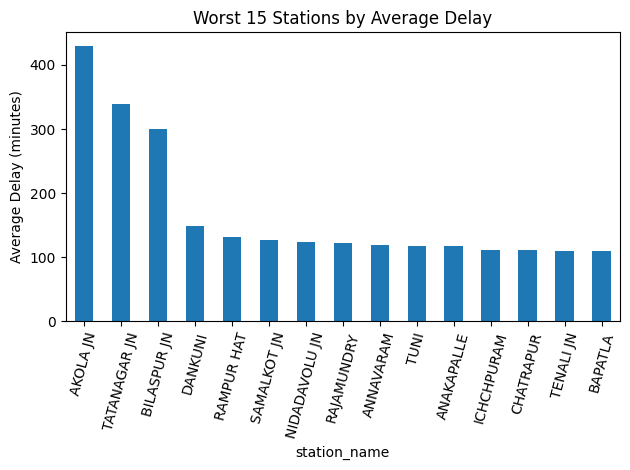

In [ ]:

# Plot 4: Station performance

station_delay = (
    df.groupby("station_name")["average_delay_minutes"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure()
station_delay.plot(kind="bar")
plt.title("Worst 15 Stations by Average Delay")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()